# Lecture10: Data Wrangling With Pandas II

<h2>Outline<span class="tocSkip"></span></h2>
<hr>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Working-With-Strings" data-toc-modified-id="1.-Working-With-Strings-2">1. Working With Strings</a></span></li><li><span><a href="#2.-Working-With-Datetimes" data-toc-modified-id="2.-Working-With-Datetimes-3">2. Working With Datetimes</a></span></li><li><span><a href="#3.-Hierachical-Indexing" data-toc-modified-id="3.-Hierachical-Indexing-4">3. Hierachical Indexing</a></span></li><li><span><a href="#4.-Visualizing-DataFrames" data-toc-modified-id="4.-Visualizing-DataFrames-5">4. Visualizing DataFrames</a></span></li>

## Learning Objectives
<hr>

- Manipulate strings in Pandas by accessing methods from the `Series.str` attribute.
- Understand how to use regular expressions in Pandas for wrangling strings.
- Differentiate between datetime object in Pandas such as `Timestamp`, `Timedelta`, `Period`, `DateOffset`.
- Index a datetime index with partial string indexing.
- Perform basic datetime operations like splitting a datetime into constituent parts (e.g., `year`, `weekday`, `second`, etc), apply offsets, change timezones, and resample with `.resample()`.
- Make basic plots in Pandas by accessing the `.plot` attribute or importing functions from `pandas.plotting`.

## 1. Working With Strings
<hr>

In [99]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", 20)

Working with text data is common in data science. Luckily, Pandas Series and Index objects are equipped with a set of string processing methods which we'll explore here.

### String dtype

String data is represented in pandas using the `object` dtype, which is a generic dtype for representing mixed data or data of unknown size. It would be better to have a dedicated dtype and Pandas has just introduced this: the `StringDtype`. `object` remains the default dtype for strings however, as Pandas looks to continue testing and improving the `string` dtype. You can read more about the `StringDtype` in the [Pandas documentation here](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-data-types).

### String Methods

We've seen how libraries like NumPy and Pandas can vectorise operations for increased speed and useability:

In [100]:
x = np.array([1, 2, 3, 4, 5])
x * 2

array([ 2,  4,  6,  8, 10])

This is not the case for arrays of strings however:

In [101]:
x = np.array(['Tom', 'Mike', 'Tiffany', 'Joel', 'Varada'])
x.upper()

AttributeError: 'numpy.ndarray' object has no attribute 'upper'

Instead, you would have to operate on each string object one at a time, using a loop for example:

In [102]:
[name.upper() for name in x]

['TOM', 'MIKE', 'TIFFANY', 'JOEL', 'VARADA']

But even this will fail if your array contains a missing value:

In [103]:
x = np.array(['Tom', 'Mike', None, 'Tiffany', 'Joel', 'Varada'])
[name.upper() for name in x]

AttributeError: 'NoneType' object has no attribute 'upper'

Pandas addresses both of these issues (vectorization and missing values) with its string methods. String methods can be accessed by the `.str` attribute of Pandas Series and Index objects. Pretty much all built-in string operations (`.upper()`, `.lower()`, `.split()`, etc) and more are available.

In [104]:
s = pd.Series(x)
s

0        Tom
1       Mike
2       None
3    Tiffany
4       Joel
5     Varada
dtype: object

In [105]:
s.str.upper()

0        TOM
1       MIKE
2       None
3    TIFFANY
4       JOEL
5     VARADA
dtype: object

In [106]:
s.str.split("ff", expand=True)

,0,1
0,Tom,None
1,Mike,None
2,None,None
3,Ti,any
4,Joel,None
5,Varada,None


In [107]:
s.str.len()

0    3.0
1    4.0
2    NaN
3    7.0
4    4.0
5    6.0
dtype: float64

We can also operate on Index objects (i.e., index or column labels):

In [108]:
df = pd.DataFrame(np.random.rand(5, 3),
                  columns = ['Measured Feature', 'recorded feature', 'PredictedFeature'],
                  index = [f"ROW{_}" for _ in range(5)])
df

,Measured Feature,recorded feature,PredictedFeature
ROW0,0.905046,0.325367,0.170852
ROW1,0.545039,0.192542,0.121262
ROW2,0.310735,0.824639,0.419149
ROW3,0.635867,0.123577,0.857901
ROW4,0.748762,0.375934,0.841968


In [109]:
type(df.columns)

pandas.core.indexes.base.Index

Let's clean up those labels by:
1. Removing the word "feature" and "Feature"
2. Lowercase the "ROW" and add an underscore between the digit and letters

In [110]:
df.columns = df.columns.str.capitalize().str.replace("feature", "").str.strip()

In [111]:
df.index = df.index.str.lower().str.replace("w", "w_")

In [112]:
df

,Measured,Recorded,Predicted
row_0,0.905046,0.325367,0.170852
row_1,0.545039,0.192542,0.121262
row_2,0.310735,0.824639,0.419149
row_3,0.635867,0.123577,0.857901
row_4,0.748762,0.375934,0.841968


There are so many string operations we can use in Pandas. 

Here's a full list of all the string methods available in Pandas pulled from the documentation:

| Method                     | Description                                                                                                                       |
| -------------------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| `Series.str.cat`           | Concatenate strings                                                                                                               |
| `Series.str.split`         | Split strings on delimiter                                                                                                        |
| `Series.str.rsplit`        | Split strings on delimiter working from the end of the string                                                                     |
| `Series.str.get`           | Index into each element (retrieve i-th element)                                                                                   |
| `Series.str.join`          | Join strings in each element of the Series with passed separator                                                                  |
| `Series.str.get_dummies`   | Split strings on the delimiter returning DataFrame of dummy variables                                                             |
| `Series.str.contains`      | Return boolean array if each string contains pattern/regex                                                                        |
| `Series.str.replace`       | Replace occurrences of pattern/regex/string with some other string or the return value of a callable given the occurrence         |
| `Series.str.repeat`        | Duplicate values (`s.str.repeat(3)` equivalent to `x * 3`)                                                                        |
| `Series.str.pad`           | "Add whitespace to left, right, or both sides of strings"                                                                         |
| `Series.str.center`        | Equivalent to `str.center`                                                                                                        |
| `Series.str.ljust`         | Equivalent to `str.ljust`                                                                                                         |
| `Series.str.rjust`         | Equivalent to `str.rjust`                                                                                                         |
| `Series.str.zfill`         | Equivalent to `str.zfill`                                                                                                         |
| `Series.str.wrap`          | Split long strings into lines with length less than a given width                                                                 |
| `Series.str.slice`         | Slice each string in the Series                                                                                                   |
| `Series.str.slice_replace` | Replace slice in each string with passed value                                                                                    |
| `Series.str.count`         | Count occurrences of pattern                                                                                                      |
| `Series.str.startswith`    | Equivalent to `str.startswith(pat)` for each element                                                                              |
| `Series.str.endswith`      | Equivalent to `str.endswith(pat)` for each element                                                                                |
| `Series.str.findall`       | Compute list of all occurrences of pattern/regex for each string                                                                  |
| `Series.str.match`         | "Call `re.match` on each element, returning matched groups as list"                                                               |
| `Series.str.extract`       | "Call `re.search` on each element, returning DataFrame with one row for each element and one column for each regex capture group" |
| `Series.str.extractall`    | "Call `re.findall` on each element, returning DataFrame with one row for each match and one column for each regex capture group"  |
| `Series.str.len`           | Compute string lengths                                                                                                            |
| `Series.str.strip`         | Equivalent to `str.strip`                                                                                                         |
| `Series.str.rstrip`        | Equivalent to `str.rstrip`                                                                                                        |
| `Series.str.lstrip`        | Equivalent to `str.lstrip`                                                                                                        |
| `Series.str.partition`     | Equivalent to `str.partition`                                                                                                     |
| `Series.str.rpartition`    | Equivalent to `str.rpartition`                                                                                                    |
| `Series.str.lower`         | Equivalent to `str.lower`                                                                                                         |
| `Series.str.casefold`      | Equivalent to `str.casefold`                                                                                                      |
| `Series.str.upper`         | Equivalent to `str.upper`                                                                                                         |
| `Series.str.find`          | Equivalent to `str.find`                                                                                                          |
| `Series.str.rfind`         | Equivalent to `str.rfind`                                                                                                         |
| `Series.str.index`         | Equivalent to `str.index`                                                                                                         |
| `Series.str.rindex`        | Equivalent to `str.rindex`                                                                                                        |
| `Series.str.capitalize`    | Equivalent to `str.capitalize`                                                                                                    |
| `Series.str.swapcase`      | Equivalent to `str.swapcase`                                                                                                      |
| `Series.str.normalize`     | Return Unicode normal form. Equivalent to `unicodedata.normalize`                                                                 |
| `Series.str.translate`     | Equivalent to `str.translate`                                                                                                     |
| `Series.str.isalnum`       | Equivalent to `str.isalnum`                                                                                                       |
| `Series.str.isalpha`       | Equivalent to `str.isalpha`                                                                                                       |
| `Series.str.isdigit`       | Equivalent to `str.isdigit`                                                                                                       |
| `Series.str.isspace`       | Equivalent to `str.isspace`                                                                                                       |
| `Series.str.islower`       | Equivalent to `str.islower`                                                                                                       |
| `Series.str.isupper`       | Equivalent to `str.isupper`                                                                                                       |
| `Series.str.istitle`       | Equivalent to `str.istitle`                                                                                                       |
| `Series.str.isnumeric`     | Equivalent to `str.isnumeric`                                                                                                     |
| `Series.str.isdecimal`     | Equivalent to `str.isdecimal`                                                                                                     |

We can also use the dataframe method `df.replace()` to do string replacements:

In [113]:
df = pd.DataFrame({'col1': ['replace me', 'b', 'c'],
                   'col2': [1, 99999, 3]})
df

,col1,col2
0,replace me,1
1,b,99999
2,c,3


In [114]:
df.replace({'replace me': 'a',
            99999: 2})

,col1,col2
0,a,1
1,b,2
2,c,3


### Regular Expressions

A regular expression (regex) is a sequence of characters that defines a search pattern. For more complex string operations, you'll definitely want to use regex. [Here's a great cheatsheet](https://www.rexegg.com/regex-quickstart.html) of regular expression syntax. I am self-admittedly not a regex expert, I usually jump over to [RegExr.com](https://regexr.com/) and play around until I find the expression I want. Many Pandas string functions accept regular expressions as input, these are the ones I use most often:

|Method|Description|
|---|---|
|`match()`|Call re.match() on each element, returning a boolean.
|`extract()`|Call re.match() on each element, returning matched groups as strings.
|`findall()`|Call re.findall() on each element
|`replace()`|Replace occurrences of pattern with some other string
|`contains()`|Call re.search() on each element, returning a boolean
|`count()`|Count occurrences of pattern
|`split()`|Equivalent to str.split(), but accepts regexps
|`rsplit()`|Equivalent to str.rsplit(), but accepts regexps

For example, we can easily find all names in our Series that start and end with a consonant:

In [115]:
s = pd.Series(['Tom', 'Mike', None, 'Tiffany', 'Joel', 'Varada'])
s

0        Tom
1       Mike
2       None
3    Tiffany
4       Joel
5     Varada
dtype: object

In [116]:
s.str.findall(r'^[^AEIOU].*[^aeiou]$')

0        [Tom]
1           []
2         None
3    [Tiffany]
4       [Joel]
5           []
dtype: object

Let's break down that regex:

|Part|Description|
|---|---|
|`^`|Specifies the start of a string|
|`[^AEIOU]`|Square brackets match a single character. When `^` is used inside square brackets it means "not", so we are are saying, "the first character of the string should not be A, E, I, O, or U (i.e., a vowel)"|
|`.*`|`.` matches any character and `*` means "0 or more time", this is basically saying that we can have any number of characters in the middle of our string|
|`[^aeiou]$`| `$` matches the end of the string, so we are saying, we don't want the last character to be a lowercase vowel|

Regex can do some truly magical things so keep it in mind when you're doing complicated text wrangling. Let's see one more example on the cycling dataset:

In [117]:
df = pd.read_csv('../data/cycling_data.csv', index_col=0)
df

,Name,Type,Time,Distance,Comments
Date,,,,,
"10 Jun 2023, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
"10 Jun 2023, 13:52:18",Morning Ride,Ride,2531,13.03,rain
"11 Jun 2023, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
"11 Jun 2023, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
"12 Jun 2023, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
"4 Jul 2023, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
"9 Jul 2023, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
"10 Jul 2023, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


We could find all the comments that contains the string "Rain" or "rain":

In [118]:
df.loc[df['Comments'].str.contains(r"[Rr]ain")]

,Name,Type,Time,Distance,Comments
Date,,,,,
"10 Jun 2023, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
"10 Jun 2023, 13:52:18",Morning Ride,Ride,2531,13.03,rain
"17 Jun 2023, 13:43:34",Morning Ride,Ride,2285,12.60,Raining
"18 Jun 2023, 13:49:53",Morning Ride,Ride,2903,14.57,Raining today
"26 Jun 2023, 00:13:33",Afternoon Ride,Ride,1860,12.52,raining


If we didn't want to include "Raining" or "raining", we could do:

In [119]:
df.loc[df['Comments'].str.contains(r"^[Rr]ain$")]

,Name,Type,Time,Distance,Comments
Date,,,,,
"10 Jun 2023, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
"10 Jun 2023, 13:52:18",Morning Ride,Ride,2531,13.03,rain


We can even split strings and separate them into new columns, for example, based on punctuation:

In [120]:
df['Comments'].str.split(r"[.,!]", expand=True)

,0,1
Date,,
"10 Jun 2023, 00:13:04",Rain,None
"10 Jun 2023, 13:52:18",rain,None
"11 Jun 2023, 00:23:50",Wet road but nice weather,None
"11 Jun 2023, 14:06:19",Stopped for photo of sunrise,None
"12 Jun 2023, 00:28:05",Tired by the end of the week,None
...,...,...
"4 Jul 2023, 01:08:08",Very tired,riding into the wind
"9 Jul 2023, 13:55:40",Really cold,But feeling good
"10 Jul 2023, 00:10:31",Feeling good after a holiday break,


My point being here that you can pretty much do anything your heart desires!

## 2. Working With Datetimes
<hr>

Just like with strings, Pandas has extensive functionality for working with time series data.

### Datetime dtype and Motivation for Using Pandas

Python has built-in support for datetime format, an object that contains time and date information, in the `datetime` module.

In [121]:
from datetime import datetime, timedelta

In [122]:
date = datetime(year=2023, month=7, day=9, hour=13, minute=54)
date

datetime.datetime(2023, 7, 9, 13, 54)

We can also parse directly from a string, see [format codes here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes):

In [123]:
date = datetime.strptime("July 9 2023, 13:54", "%B %d %Y, %H:%M")
date

datetime.datetime(2023, 7, 9, 13, 54)

We can then extract specific information from our data:

In [124]:
print(f"Year: {date.strftime('%Y')}")
print(f"Month: {date.strftime('%B')}")
print(f"Day: {date.strftime('%d')}")
print(f"Day name: {date.strftime('%A')}")
print(f"Day of year: {date.strftime('%j')}")
print(f"Time of day: {date.strftime('%p')}")

Year: 2023
Month: July
Day: 09
Day name: Sunday
Day of year: 190
Time of day: PM


And perform basic operations, like adding a week:

In [125]:
date + timedelta(days=7)

datetime.datetime(2023, 7, 16, 13, 54)

But as with strings, working with arrays of datetimes in Python can be difficult and inefficient. NumPy, therefore included a new datetime object to work more effectively with dates:

In [126]:
import numpy as np
dates = np.array(["2023-07-09", "2023-08-10"], dtype="datetime64")
dates

array(['2023-07-09', '2023-08-10'], dtype='datetime64[D]')

We can create arrays using other built-in functions like `np.arange()` too:

In [127]:
dates = np.arange("2023-07", "2023-12", dtype='datetime64[M]')
dates

array(['2023-07', '2023-08', '2023-09', '2023-10', '2023-11'],
      dtype='datetime64[M]')

Now we can easily do operations on arrays of time. You can check out all the datetime units and their format in the documentation [here](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetime-units).

In [128]:
dates +  np.timedelta64(2, 'M')

array(['2023-09', '2023-10', '2023-11', '2023-12', '2024-01'],
      dtype='datetime64[M]')

But while numpy helps bring datetimes into the array world, it's missing a lot of functionality that we would commonly want/need for wrangling tasks. This is where Pandas comes in. Pandas consolidates and extends functionality from the `datetime` module, `numpy`, and other libraries like `scikits.timeseries` into a single place. Pandas provides 4 key datetime objects which we'll explore in the following sections:
1. Timestamp (like np.datetime64)
2. Timedelta (like np.timedelta64)
3. Period (custom object for regular ranges of datetimes)
4. DateOffset (custom object like timedelta but factoring in calendar rules)

### Creating Datetimes

#### From scratch

Most commonly you'll want to:
1. Create a single point in time with `pd.Timestamp()`, e.g., `2023-07-09 00:00:00`
2. Create a span of time with `pd.Period()`, e.g., `2020 Jan`
3. Create an array of datetimes with `pd.date_range()` or `pd.period_range()`

In [129]:
import pandas as pd
print(pd.Timestamp('2023-07-09'))  # parsed from string
print(pd.Timestamp(year=2023, month=7, day=9))  # pass data directly
print(pd.Timestamp(datetime(year=2023, month=7, day=9)))  # from datetime object

2023-07-09 00:00:00
2023-07-09 00:00:00
2023-07-09 00:00:00


The above is a specific point in time. Below, we can use `pd.Period()` to specify a span of time (like a day):

In [130]:
span = pd.Period('2023-07-09')
print(span)
print(span.start_time)
print(span.end_time)

2023-07-09
2023-07-09 00:00:00
2023-07-09 23:59:59.999999999


In [131]:
point = pd.Timestamp('2023-07-09 12:00')
span = pd.Period('2023-07-09')
print(f"Point: {point}")
print(f" Span: {span}")
print(f"Point in span? {span.start_time < point < span.end_time}")

Point: 2023-07-09 12:00:00
 Span: 2023-07-09
Point in span? True


Often, we want to create arrays of datetimes, not just single values. Arrays of datetimes are of the class `DatetimeIndex`/`PeriodIndex`/`TimedeltaIndex`:

In [132]:
pd.date_range('2023-09-01 12:00',
              '2023-09-11 12:00',
              freq='D')

DatetimeIndex(['2023-09-01 12:00:00', '2023-09-02 12:00:00',
               '2023-09-03 12:00:00', '2023-09-04 12:00:00',
               '2023-09-05 12:00:00', '2023-09-06 12:00:00',
               '2023-09-07 12:00:00', '2023-09-08 12:00:00',
               '2023-09-09 12:00:00', '2023-09-10 12:00:00',
               '2023-09-11 12:00:00'],
              dtype='datetime64[ns]', freq='D')

In [133]:
pd.period_range('2023-09-01',
                '2023-09-11',
                freq='D')

PeriodIndex(['2023-09-01', '2023-09-02', '2023-09-03', '2023-09-04',
             '2023-09-05', '2023-09-06', '2023-09-07', '2023-09-08',
             '2023-09-09', '2023-09-10', '2023-09-11'],
            dtype='period[D]')

We can use `Timedelta` objects to perform temporal operations like adding or subtracting time:

In [134]:
pd.date_range('2023-09-01 12:00', '2023-09-11 12:00', freq='D') + pd.Timedelta('1.5 hour')

DatetimeIndex(['2023-09-01 13:30:00', '2023-09-02 13:30:00',
               '2023-09-03 13:30:00', '2023-09-04 13:30:00',
               '2023-09-05 13:30:00', '2023-09-06 13:30:00',
               '2023-09-07 13:30:00', '2023-09-08 13:30:00',
               '2023-09-09 13:30:00', '2023-09-10 13:30:00',
               '2023-09-11 13:30:00'],
              dtype='datetime64[ns]', freq='D')

Finally, Pandas represents missing datetimes with `NaT`, which is just like `np.nan`:

In [135]:
pd.Timestamp(pd.NaT)

NaT

#### By converting existing data

It's fairly common to have an array of dates as strings. We can use `pd.to_datetime()` to convert these to datetime:

In [136]:
string_dates = ['July 9, 2023', 'August 1, 2023', 'August 28, 2023']
string_dates

['July 9, 2023', 'August 1, 2023', 'August 28, 2023']

In [137]:
pd.to_datetime(string_dates)

DatetimeIndex(['2023-07-09', '2023-08-01', '2023-08-28'], dtype='datetime64[ns]', freq=None)

For more complex datetime format, use the `format` argument (see [Python Format Codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes) for help):

In [138]:
string_dates = ['2023 9 July', '2023 1 August', '2023 28 August']
pd.to_datetime(string_dates, format="%Y %d %B")

DatetimeIndex(['2023-07-09', '2023-08-01', '2023-08-28'], dtype='datetime64[ns]', freq=None)

Or use a dictionary:

In [139]:
dict_dates = pd.to_datetime({"year": [2023, 2023, 2023],
                             "month": [7, 8, 8],
                             "day": [9, 1, 28]})  # note this is a series, not an index!
dict_dates

0   2023-07-09
1   2023-08-01
2   2023-08-28
dtype: datetime64[ns]

In [140]:
pd.Index(dict_dates)

DatetimeIndex(['2023-07-09', '2023-08-01', '2023-08-28'], dtype='datetime64[ns]', freq=None)

#### By reading directly from an external source

Let's practice by reading in our favourite cycling dataset:

In [141]:
df = pd.read_csv('../data/cycling_data.csv', index_col=0)
df

,Name,Type,Time,Distance,Comments
Date,,,,,
"10 Jun 2023, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
"10 Jun 2023, 13:52:18",Morning Ride,Ride,2531,13.03,rain
"11 Jun 2023, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
"11 Jun 2023, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
"12 Jun 2023, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
"4 Jul 2023, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
"9 Jul 2023, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
"10 Jul 2023, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


Our index is just a plain old index at the moment, with dtype `object`, full of `string` dates:

In [142]:
print(df.index.dtype)
type(df.index)

object


pandas.core.indexes.base.Index

We could manually convert our index to a datetime using `pd.to_datetime()`. But even better, `pd.read_csv()` has an argument `parse_dates` which can do this automatically when reading the file:

In [143]:
df = pd.read_csv('../data/cycling_data.csv', index_col=0, parse_dates=True)
df

,Name,Type,Time,Distance,Comments
Date,,,,,
2023-06-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2023-06-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2023-06-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2023-06-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2023-06-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2023-07-04 01:08:08,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2023-07-09 13:55:40,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2023-07-10 00:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


In [144]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [145]:
print(df.index.dtype)
type(df.index)

datetime64[ns]


pandas.core.indexes.datetimes.DatetimeIndex

The `parse_dates` argument is very flexible and you can specify the datetime format for harder to read dates. There are other related arguments like `date_parser`, `dayfirst`, etc that are also helpful, check out the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) for more.

### Indexing Datetimes

Datetime index objects are just like regular Index objects and can be selected, sliced, filtered, etc.

In [146]:
df

,Name,Type,Time,Distance,Comments
Date,,,,,
2023-06-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2023-06-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2023-06-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2023-06-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2023-06-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2023-07-04 01:08:08,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2023-07-09 13:55:40,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2023-07-10 00:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


We can do partial string indexing:

In [147]:
df.loc['2023-07']

,Name,Type,Time,Distance,Comments
Date,,,,,
2023-07-01 00:15:07,Afternoon Ride,Ride,1732,NaN,Legs feeling strong!
2023-07-01 13:45:55,Morning Ride,Ride,2222,12.82,Beautiful morning! Feeling fit
2023-07-02 00:13:09,Afternoon Ride,Ride,1756,NaN,A little tired today but good weather
2023-07-02 13:46:06,Morning Ride,Ride,2134,13.06,Bit tired today but good weather
2023-07-03 00:45:22,Afternoon Ride,Ride,1724,12.52,Feeling good
2023-07-03 13:47:36,Morning Ride,Ride,2182,12.68,Wet road
2023-07-04 01:08:08,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2023-07-09 13:55:40,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2023-07-10 00:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


Exact matching:

In [148]:
df.loc['2023-06-10']

,Name,Type,Time,Distance,Comments
Date,,,,,
2023-06-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2023-06-10 13:52:18,Morning Ride,Ride,2531,13.03,rain


In [149]:
df.loc['2023-07-10 13:47:14']

Name                        Morning Ride
Type                                Ride
Time                                2463
Distance                           12.79
Comments    Stopped for photo of sunrise
Name: 2023-07-10 13:47:14, dtype: object

And slicing:

In [150]:
df.loc['2023-07-01':'2023-07-11']

C:\Users\DONGY\AppData\Local\Temp\ipykernel_14964\2708562452.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df.loc['2023-07-01':'2023-07-11']


,Name,Type,Time,Distance,Comments
Date,,,,,
2023-07-01 00:15:07,Afternoon Ride,Ride,1732,NaN,Legs feeling strong!
2023-07-01 13:45:55,Morning Ride,Ride,2222,12.82,Beautiful morning! Feeling fit
2023-07-02 00:13:09,Afternoon Ride,Ride,1756,NaN,A little tired today but good weather
2023-07-02 13:46:06,Morning Ride,Ride,2134,13.06,Bit tired today but good weather
2023-07-03 00:45:22,Afternoon Ride,Ride,1724,12.52,Feeling good
2023-07-03 13:47:36,Morning Ride,Ride,2182,12.68,Wet road
2023-07-04 01:08:08,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2023-07-09 13:55:40,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2023-07-10 00:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


And for getting all results between two times of a day, use `df.between_time()`:

In [151]:
df.between_time('00:00', '01:00')

,Name,Type,Time,Distance,Comments
Date,,,,,
2023-06-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2023-06-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2023-06-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
2023-06-17 00:15:47,Afternoon Ride,Ride,1973,12.45,Legs feeling strong!
2023-06-18 00:15:52,Afternoon Ride,Ride,2101,12.48,Pumped up tires
2023-06-19 00:30:01,Afternoon Ride,Ride,48062,12.48,Feeling good
2023-06-24 00:35:42,Afternoon Ride,Ride,2076,12.47,"Oiled chain, bike feels smooth"
2023-06-25 00:07:21,Afternoon Ride,Ride,1775,12.10,Feeling really tired
2023-06-26 00:13:33,Afternoon Ride,Ride,1860,12.52,raining


### Manipulating Datetimes

#### Decomposition

We can easily decompose our timeseries into its constituent components. There are [many attributes](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components) that define these constituents.

In [152]:
df.index.year

Int64Index([2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='Date')

In [153]:
df.index.second

Int64Index([ 4, 18, 50, 19,  5, 48, 47, 34, 53, 52,  1,  9,  5, 41, 42, 24, 21,
            41, 33, 43, 18, 52,  7, 55,  9,  6, 22, 36,  8, 40, 31, 14, 57],
           dtype='int64', name='Date')

In [154]:
df.index.weekday

Int64Index([5, 5, 6, 6, 0, 4, 5, 5, 6, 6, 0, 0, 1, 4, 5, 5, 6, 6, 0, 0, 1, 4,
            5, 5, 6, 6, 0, 0, 1, 6, 0, 0, 1],
           dtype='int64', name='Date')

As well as methods we can use:

In [155]:
df.index.day_name()

Index(['Saturday', 'Saturday', 'Sunday', 'Sunday', 'Monday', 'Friday',
       'Saturday', 'Saturday', 'Sunday', 'Sunday', 'Monday', 'Monday',
       'Tuesday', 'Friday', 'Saturday', 'Saturday', 'Sunday', 'Sunday',
       'Monday', 'Monday', 'Tuesday', 'Friday', 'Saturday', 'Saturday',
       'Sunday', 'Sunday', 'Monday', 'Monday', 'Tuesday', 'Sunday', 'Monday',
       'Monday', 'Tuesday'],
      dtype='object', name='Date')

In [156]:
df.index.month_name()

Index(['June', 'June', 'June', 'June', 'June', 'June', 'June', 'June', 'June',
       'June', 'June', 'June', 'June', 'June', 'June', 'June', 'June', 'June',
       'June', 'June', 'June', 'June', 'July', 'July', 'July', 'July', 'July',
       'July', 'July', 'July', 'July', 'July', 'July'],
      dtype='object', name='Date')

>Note that if you're operating on a Series rather than a DatetimeIndex object, you can access this functionality through the `.dt` attribute:

In [157]:
s = pd.Series(pd.date_range('2023-09-29', '2023-09-30'))
s.year  # raises error

AttributeError: 'Series' object has no attribute 'year'

In [158]:
s.dt.year  # works

0    2023
1    2023
dtype: int64

#### Offsets and Timezones

We saw before how we can use `Timedelta` to add/subtract time to our datetimes. `Timedelta` respects absolute time, which can be problematic in some cases, where time is not regular. For example, on March 8, Canada daylight savings started and clocks **moved forward 1 hour**. This extra "calendar hour" is not accounted for in absolute time:

In [160]:
t1 = pd.Timestamp('2023-03-07 12:00:00', tz='Canada/mountain')
t2 = t1 + pd.Timedelta("1 day")
print(f"Original time: {t1}")
print(f" Plus one day: {t2}")  

Original time: 2023-03-07 12:00:00-07:00
 Plus one day: 2023-03-08 12:00:00-07:00


Instead, we'd need to use a `Dateoffset`:

In [161]:
t3 = t1 + pd.DateOffset(days=1)
print(f"Original time: {t1}")
print(f" Plus one day: {t3}")  # note that time has stayed at 12:00

Original time: 2023-03-07 12:00:00-07:00
 Plus one day: 2023-03-08 12:00:00-07:00


We included timezone information above. By default, datetime objects are "timezone unaware". To associate times with a timezone, we can use the `tz` argument in construction, or we can use the `tz_localize()` method:

In [163]:
print(f"        No timezone: {pd.Timestamp('2020-03-07 12:00:00').tz}")
print(f"             tz arg: {pd.Timestamp('2020-03-07 12:00:00', tz='Canada/Mountain').tz}")
print(f".tz_localize method: {pd.Timestamp('2020-03-07 12:00:00').tz_localize('Canada/Mountain').tz}")

        No timezone: None
             tz arg: Canada/Mountain
.tz_localize method: Canada/Mountain


We can convert between timezones using the `.tz_convert()` method.

In [169]:
df = pd.read_csv('../data/cycling_data.csv', index_col=0, parse_dates=True)
df

,Name,Type,Time,Distance,Comments
Date,,,,,
2023-06-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2023-06-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2023-06-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2023-06-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2023-06-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2023-07-04 01:08:08,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2023-07-09 13:55:40,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2023-07-10 00:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


Shall we convert the Canada/Pacific timezone to 

In [170]:
df.index = df.index.tz_localize("Canada/Mountain")  # first specify the current timezone
df.index = df.index.tz_convert("Asia/Shanghai")  # then convert to the proper timezone
df

,Name,Type,Time,Distance,Comments
Date,,,,,
2023-06-10 14:13:04+08:00,Afternoon Ride,Ride,2084,12.62,Rain
2023-06-11 03:52:18+08:00,Morning Ride,Ride,2531,13.03,rain
2023-06-11 14:23:50+08:00,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2023-06-12 04:06:19+08:00,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2023-06-12 14:28:05+08:00,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2023-07-04 15:08:08+08:00,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2023-07-10 03:55:40+08:00,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2023-07-10 14:10:31+08:00,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


In [172]:
import pytz

print('Timezones')
for timeZone in pytz.all_timezones:
    print(timeZone)

Timezones
Africa/Abidjan
Africa/Accra
Africa/Addis_Ababa
Africa/Algiers
Africa/Asmara
Africa/Asmera
Africa/Bamako
Africa/Bangui
Africa/Banjul
Africa/Bissau
Africa/Blantyre
Africa/Brazzaville
Africa/Bujumbura
Africa/Cairo
Africa/Casablanca
Africa/Ceuta
Africa/Conakry
Africa/Dakar
Africa/Dar_es_Salaam
Africa/Djibouti
Africa/Douala
Africa/El_Aaiun
Africa/Freetown
Africa/Gaborone
Africa/Harare
Africa/Johannesburg
Africa/Juba
Africa/Kampala
Africa/Khartoum
Africa/Kigali
Africa/Kinshasa
Africa/Lagos
Africa/Libreville
Africa/Lome
Africa/Luanda
Africa/Lubumbashi
Africa/Lusaka
Africa/Malabo
Africa/Maputo
Africa/Maseru
Africa/Mbabane
Africa/Mogadishu
Africa/Monrovia
Africa/Nairobi
Africa/Ndjamena
Africa/Niamey
Africa/Nouakchott
Africa/Ouagadougou
Africa/Porto-Novo
Africa/Sao_Tome
Africa/Timbuktu
Africa/Tripoli
Africa/Tunis
Africa/Windhoek
America/Adak
America/Anchorage
America/Anguilla
America/Antigua
America/Araguaina
America/Argentina/Buenos_Aires
America/Argentina/Catamarca
America/Argentina/

We could have also used a `DateOffset` if we knew the offset we wanted to apply, in this case, 7 hours:

In [171]:
df = pd.read_csv('../data/cycling_data.csv', index_col=0, parse_dates=True)
df.index = df.index + pd.DateOffset(hours=+8)
df

,Name,Type,Time,Distance,Comments
Date,,,,,
2023-06-10 08:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2023-06-10 21:52:18,Morning Ride,Ride,2531,13.03,rain
2023-06-11 08:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2023-06-11 22:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2023-06-12 08:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2023-07-04 09:08:08,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2023-07-09 21:55:40,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2023-07-10 08:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


#### Resampling and Aggregating

One of the most common operations with time series is resampling the time series to a coarser/finer/regular resolution. 

For example, we may want to resample daily data to weekly data. We can do that with the `.resample()` method. 


In [173]:
df.index

DatetimeIndex(['2023-06-10 08:13:04', '2023-06-10 21:52:18',
               '2023-06-11 08:23:50', '2023-06-11 22:06:19',
               '2023-06-12 08:28:05', '2023-06-16 21:57:48',
               '2023-06-17 08:15:47', '2023-06-17 21:43:34',
               '2023-06-18 21:49:53', '2023-06-18 08:15:52',
               '2023-06-19 08:30:01', '2023-06-19 21:52:09',
               '2023-06-20 09:02:05', '2023-06-23 21:50:41',
               '2023-06-24 08:35:42', '2023-06-24 21:41:24',
               '2023-06-25 08:07:21', '2023-06-25 21:35:41',
               '2023-06-26 08:13:33', '2023-06-26 21:42:43',
               '2023-06-27 09:00:18', '2023-06-30 21:53:52',
               '2023-07-01 08:15:07', '2023-07-01 21:45:55',
               '2023-07-02 08:13:09', '2023-07-02 21:46:06',
               '2023-07-03 08:45:22', '2023-07-03 21:47:36',
               '2023-07-04 09:08:08', '2023-07-09 21:55:40',
               '2023-07-10 08:10:31', '2023-07-10 21:47:14',
               '2023-07-

In [174]:
df.resample("1D")

`Resampler` objects are very similar to the `groupby` objects. We need to apply an aggregating function on our grouped timeseries, just like we did with `groupby` objects:

In [175]:
dfr = df.resample("1D").mean()
dfr

C:\Users\DONGY\AppData\Local\Temp\ipykernel_14964\240521076.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfr = df.resample("1D").mean()


,Time,Distance
Date,,
2023-06-10,2307.5,12.825
2023-06-11,2027.5,12.680
2023-06-12,1891.0,12.480
2023-06-13,NaN,NaN
2023-06-14,NaN,NaN
...,...,...
2023-07-07,NaN,NaN
2023-07-08,NaN,NaN
2023-07-09,2149.0,12.700


In [176]:
dfr['Weekday'] = dfr.index.day_name()
dfr.head(10)

,Time,Distance,Weekday
Date,,,
2023-06-10,2307.5,12.825,Saturday
2023-06-11,2027.5,12.680,Sunday
2023-06-12,1891.0,12.480,Monday
2023-06-13,NaN,NaN,Tuesday
2023-06-14,NaN,NaN,Wednesday
2023-06-15,NaN,NaN,Thursday
2023-06-16,2272.0,12.450,Friday
2023-06-17,2129.0,12.525,Saturday
2023-06-18,2502.0,13.525,Sunday


Pandas support "business time" operations and format codes in all the timeseries functions we've seen so far. You can check out [the documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) for more info, but let's specify business days here to get rid of those weekends:

In [177]:
dfr = df.resample("1B").mean()  # "B" is business day
dfr['Weekday'] = dfr.index.day_name()
dfr.head(10)

C:\Users\DONGY\AppData\Local\Temp\ipykernel_14964\3594594005.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfr = df.resample("1B").mean()  # "B" is business day


,Time,Distance,Weekday
Date,,,
2023-06-09,2167.5,12.7525,Friday
2023-06-12,1891.0,12.4800,Monday
2023-06-13,NaN,NaN,Tuesday
2023-06-14,NaN,NaN,Wednesday
2023-06-15,NaN,NaN,Thursday
2023-06-16,2306.8,12.9100,Friday
2023-06-19,25076.0,12.5350,Monday
2023-06-20,2961.0,12.8100,Tuesday
2023-06-21,NaN,NaN,Wednesday


## 3. Hierachical Indexing
<hr>

**Hierachical indexing**, sometimes called "multi-indexing" or "stacked indexing", is how Pandas "nests" data. The idea is to facilitate the storage of high dimensional data in a 2D dataframe.

### Creating a Hierachical Index

For example, we want to track how many courses each Master of Data Science instructor taught over the years in a Pandas Series.

We could use a tuple to make an appropriate index:

In [178]:
index = [('Tom', 2020), ('Tom', 2021),
         ('Mike', 2020), ('Mike', 2021),
         ('Tiffany', 2020), ('Tiffany', 2021)]
courses = [4, 6, 5, 5, 6, 3]
s = pd.Series(courses, index)
s

(Tom, 2020)        4
(Tom, 2021)        6
(Mike, 2020)       5
(Mike, 2021)       5
(Tiffany, 2020)    6
(Tiffany, 2021)    3
dtype: int64

In [179]:
s.loc[("Tom", 2020):("Tom", 2021)]

(Tom, 2020)    4
(Tom, 2021)    6
dtype: int64

But if we wanted to get all of the values for 2020, we'd need to do some messy looping:

In [180]:
s[[i for i in s.index if i[1] == 2020]]

(Tom, 2020)        4
(Mike, 2020)       5
(Tiffany, 2020)    6
dtype: int64

The better way to set up this problem is with a multi-index ("hierachical index"). We can create a multi-index with `pd.MultiIndex.from_tuple()`. There are [other variations](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html) of `.from_X` but tuple is most common.

In [181]:
mi = pd.MultiIndex.from_tuples(index)
mi

MultiIndex([(    'Tom', 2020),
            (    'Tom', 2021),
            (   'Mike', 2020),
            (   'Mike', 2021),
            ('Tiffany', 2020),
            ('Tiffany', 2021)],
           )

In [182]:
s = pd.Series(courses, mi)
s

Tom      2020    4
         2021    6
Mike     2020    5
         2021    5
Tiffany  2020    6
         2021    3
dtype: int64

Now we can do more efficient and logical indexing:

In [183]:
s.loc['Tom']

2020    4
2021    6
dtype: int64

In [185]:
s.loc[:, 2020]

Tom        4
Mike       5
Tiffany    6
dtype: int64

In [186]:
s.loc["Tom", 2020]

4

We could also create the index by passing iterables like a list of lists directly to the `index` argument, but I feel it's not as explicit or intutitive as using `pd.MultIndex`:

In [187]:
index = [['Tom', 'Tom', 'Mike', 'Mike', 'Tiffany', 'Tiffany'],
         [2020, 2021, 2020, 2021, 2020, 2021]]
courses = [4, 6, 5, 5, 6, 3]
s = pd.Series(courses, index)
s

Tom      2020    4
         2021    6
Mike     2020    5
         2021    5
Tiffany  2020    6
         2021    3
dtype: int64

### Stacking / Unstacking

We could also represent our multi-index series as a dataframe. Pandas noticed this too and provides the `.stack()` and `.unstack()` methods for switching between dataframes and multi-index series:

In [188]:
s = s.unstack()
s

,2020,2021
Mike,5,5
Tiffany,6,3
Tom,4,6


In [189]:
s.stack()

Mike     2020    5
         2021    5
Tiffany  2020    6
         2021    3
Tom      2020    4
         2021    6
dtype: int64

### Using a Hierachical Index

Observing the multi-index <-> dataframe equivalence above, you might wonder why we would even want multi-indices. Above, we were only dealing with 2D data, but a multi-index allows us to store any arbitrary number of dimensions:

In [190]:
index = [['Tom', 'Tom', 'Mike', 'Mike', 'Tiffany', 'Tiffany'],
         [2020, 2021, 2020, 2021, 2020, 2021]]
courses = [4, 6, 5, 5, 6, 3]
s = pd.Series(courses, index)
s

Tom      2020    4
         2021    6
Mike     2020    5
         2021    5
Tiffany  2020    6
         2021    3
dtype: int64

In [191]:
pd.DataFrame(s).stack()

Tom      2020  0    4
         2021  0    6
Mike     2020  0    5
         2021  0    5
Tiffany  2020  0    6
         2021  0    3
dtype: int64

In [192]:
s.loc['Tom']

2020    4
2021    6
dtype: int64

In [193]:
tom = pd.DataFrame({"Courses": [4, 6],
                    "Students": [273, 342]},
                    index = [2020, 2021])
mike = pd.DataFrame({"Courses": [5, 5],
                     "Students": [293, 420]},
                     index = [2020, 2021])
tiff = pd.DataFrame({"Courses": [6, 3],
                     "Students": [363, 190]},
                     index = [2020, 2021])

We can now join the three 2D dataframes. There are so many ways you can do this. We can use `pd.concat()` and then specify the `keys` argument:

In [194]:
s3 = pd.concat((tom, mike, tiff),
               keys= ['Tom', 'Mike', 'Tiff'],
               axis=0)
s3

Courses  Students
Tom  2020        4       273
     2021        6       342
Mike 2020        5       293
     2021        5       420
Tiff 2020        6       363
     2021        3       190

Now we have 3 dimensions of information in a single structure!

In [195]:
s3.stack()

Tom   2020  Courses       4
            Students    273
      2021  Courses       6
            Students    342
Mike  2020  Courses       5
            Students    293
      2021  Courses       5
            Students    420
Tiff  2020  Courses       6
            Students    363
      2021  Courses       3
            Students    190
dtype: int64

In [196]:
s3.loc['Tom']

,Courses,Students
2020,4,273
2021,6,342


In [197]:
s3.loc['Tom', 2020]

Courses       4
Students    273
Name: (Tom, 2020), dtype: int64

We can access deeper levels in various ways:

In [198]:
s3.loc['Tom', 2020]['Courses']

4

In [199]:
s3.loc[('Tom', 2020), 'Courses']

4

In [200]:
s3.loc[('Tom', 2020), 'Courses']

4

If we name our index columns, we can also use `.query()`:

In [201]:
s3 = s3.rename_axis(index=["Name", "Year"])
s3

Courses  Students
Name Year                   
Tom  2020        4       273
     2021        6       342
Mike 2020        5       293
     2021        5       420
Tiff 2020        6       363
     2021        3       190

In [202]:
s3.query("Year == 2020")

,,Courses,Students
Name,Year,,
Tom,2020,4,273
Mike,2020,5,293
Tiff,2020,6,363


Or you might prefer the "stacked" version of our hierachical index:

In [203]:
s3.stack()

Name  Year          
Tom   2020  Courses       4
            Students    273
      2021  Courses       6
            Students    342
Mike  2020  Courses       5
            Students    293
      2021  Courses       5
            Students    420
Tiff  2020  Courses       6
            Students    363
      2021  Courses       3
            Students    190
dtype: int64

In [205]:
s3.stack().loc[('Tom', 2020, 'Courses')]

4

By the way, we can also use all the previous methods we've learned about on hierachical dataframes:

In [206]:
s3.sort_index(ascending=False)

Courses  Students
Name Year                   
Tom  2021        6       342
     2020        4       273
Tiff 2021        3       190
     2020        6       363
Mike 2021        5       420
     2020        5       293

In [207]:
s3.sort_values(by='Students')

,,Courses,Students
Name,Year,,
Tiff,2021,3,190
Tom,2020,4,273
Mike,2020,5,293
Tom,2021,6,342
Tiff,2020,6,363
Mike,2021,5,420


## 4. Visualizing DataFrames
<hr>

Pandas provides a `.plot()` method on Series and DataFrames which I wanted to show briefly here.

### Simple Plots

In [210]:
df = pd.read_csv('../data/cycling_data.csv', index_col=0, parse_dates=True).dropna()

Let's go ahead and make a plot of the distances I've ridden:

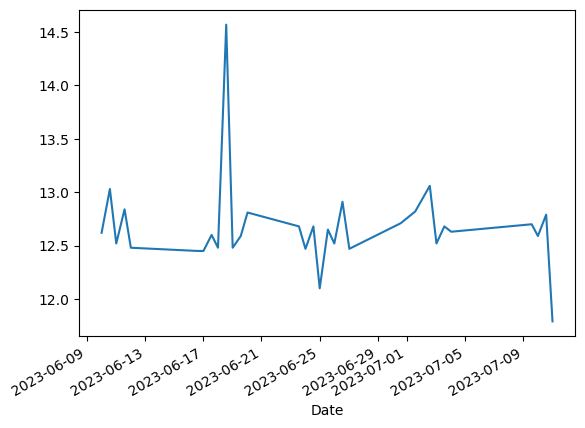

In [211]:
df['Distance'].plot.line();

Cumulative distance might be more informative:

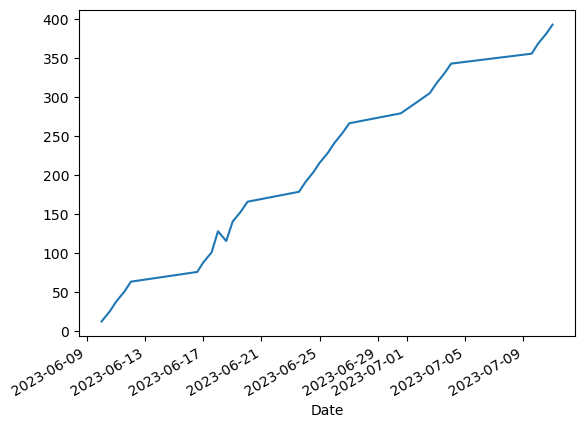

In [212]:
df['Distance'].cumsum().plot.line();

There are many configuration options for these plots which build of the `matplotlib` library:

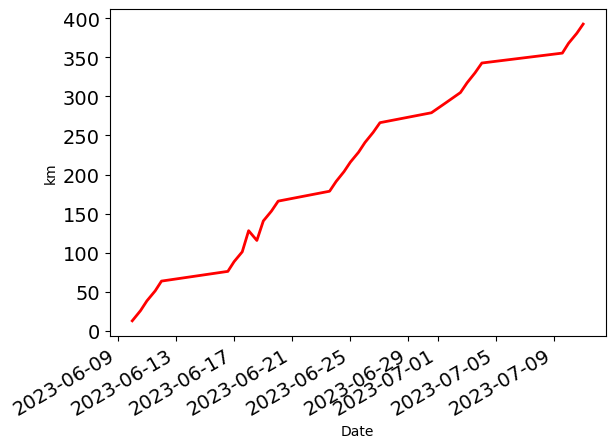

In [213]:
df['Distance'].cumsum().plot.line(fontsize=14, linewidth = 2, color = 'r', ylabel="km");

We can use built-in themes for the plots which do a lot of the colour and text formatting:

In [214]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16,
                     'axes.labelweight': 'bold',
                     'figure.figsize': (8,6)})

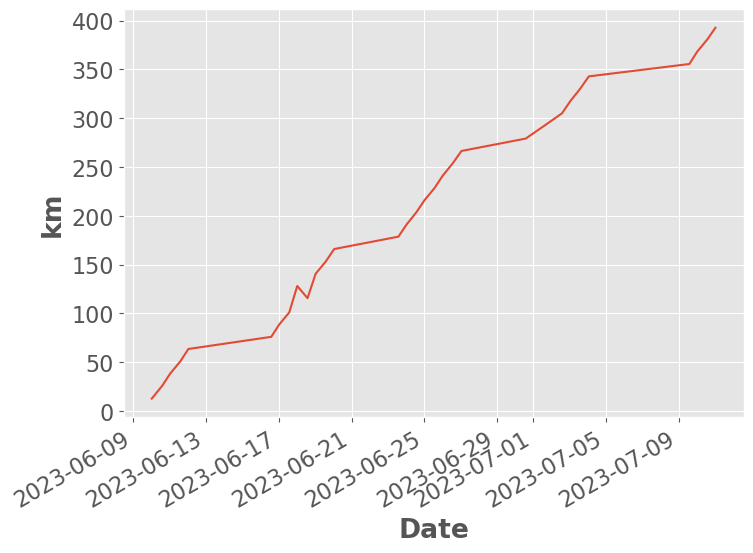

In [215]:
df['Distance'].dropna().cumsum().plot.line(ylabel="km");

There are many other kinds of plots you can make too:

|Method|Plot Type|
|---|---|
|`bar` or `barh` | bar plots|
|`hist` | histogram|
|`box` | boxplot|
|`kde` or `density` | density plots|
|`area` | area plots|
|`scatter` | scatter plots|
|`hexbin` | hexagonal bin plots|
|`pie` | pie plots|

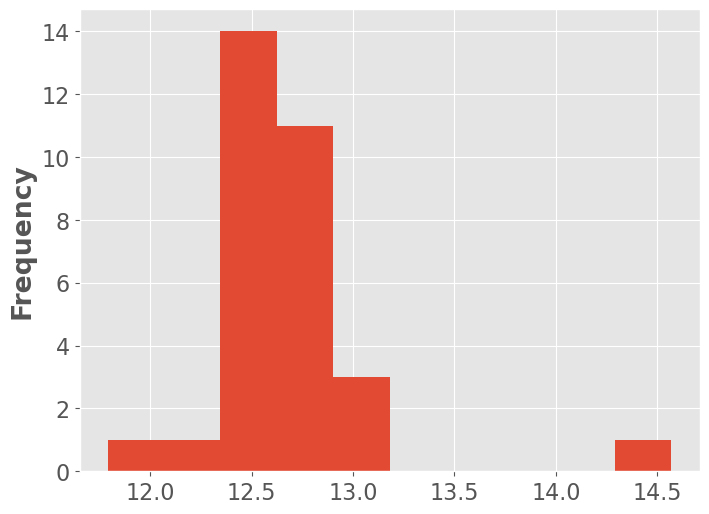

In [217]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16,
                     'axes.labelweight': 'bold',
                     'figure.figsize': (8,6)})
df['Distance'].plot.hist();

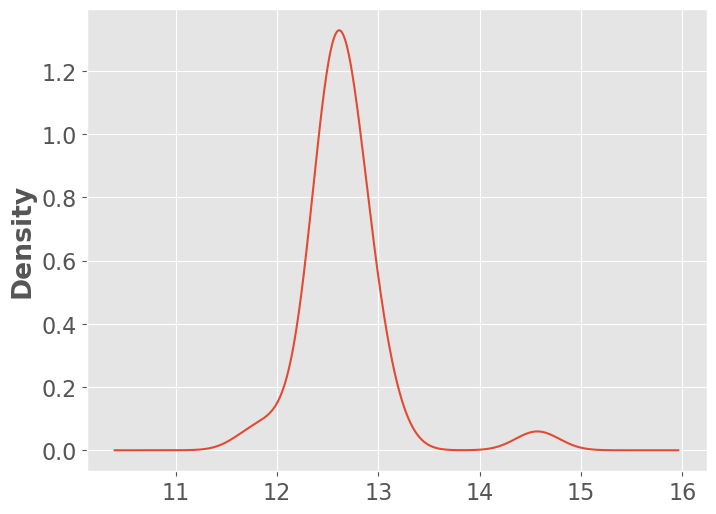

In [218]:
df['Distance'].plot.density();

### Pandas Plotting

Pandas also supports a few more advanced plotting functions in the `pandas.plotting` module. You can view them in the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plotting-tools).

In [219]:
from pandas.plotting import scatter_matrix

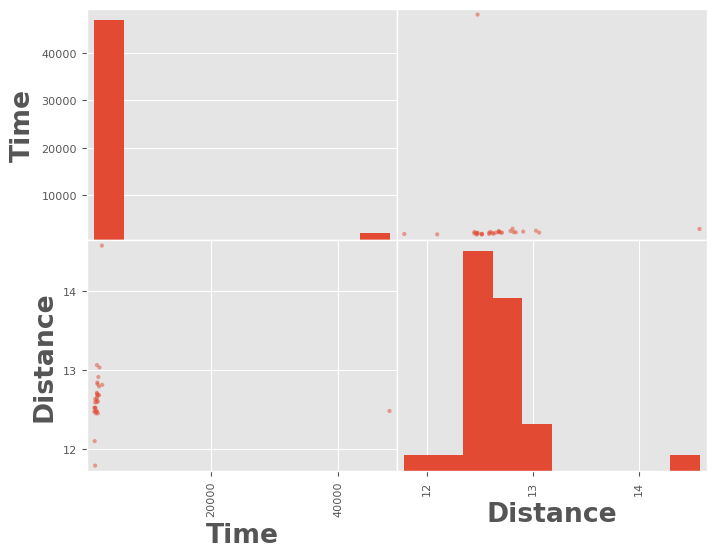

In [220]:
scatter_matrix(df);

We have an outlier time in the data above, a time value of ~48,000. Let's remove it and re-plot.

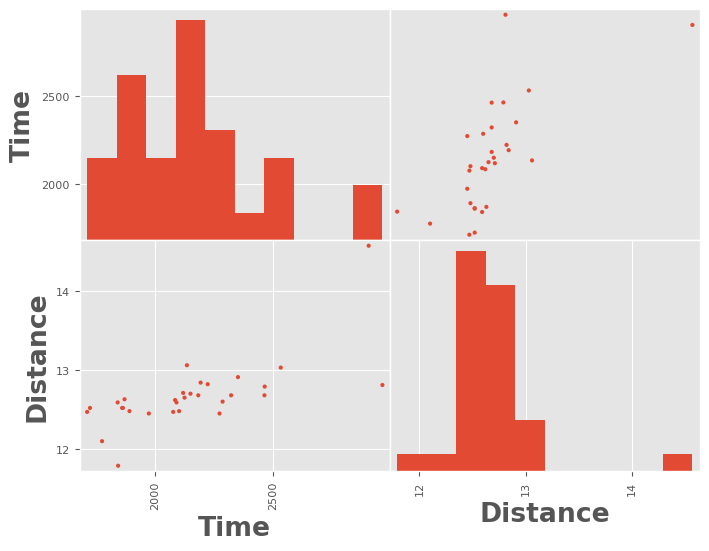

In [221]:
scatter_matrix(df.query('Time < 4000'), alpha=1);